# What is Gradient desent ?
It is a first-order iterative algorithm used to find a local minimum of a differentiable multivariate function.

The idea is to take repeated steps in the opposite direction of the gradient (or approximate gradient) of the function at the current point, because this is the direction of steepest descent. Conversely, stepping in the direction of the gradient will lead to a local maximum of that function


<img src="Gradient_descent.svg.png" alt="Drawing" style="width: 300px;" title="Gradient Desent"/>



In [228]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

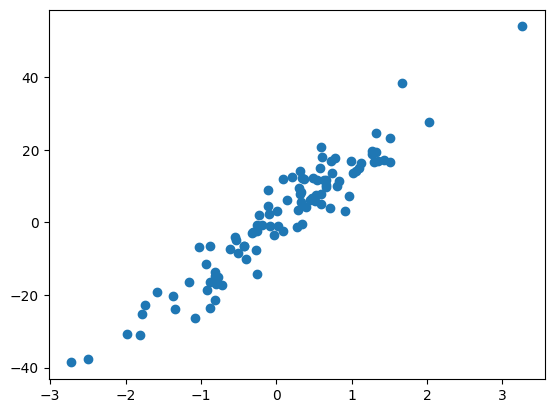

In [229]:
X,y = make_regression(n_samples=100 , n_features= 1 , n_informative=1 ,n_targets=1 ,noise=5)
plt.scatter(X,y)

In [230]:
X_scaled = (X - np.min(X))/(np.max(X)-np.min(X))
y_scaled = (y - np.min(y))/(np.max(X)-np.min(y))

In [231]:
class GradientDescent:
    def __init__(self, lr = 0.001 , m=0 ,b=0):
        self.lr = lr
        self.m = m
        self.b = b

    def fit(self,X,y ,epoch=1000):
        for i in range(epoch):
            index = np.random.randint(X.shape[0])
            loss = (y[index] - self.m*X[index] - self.b )**2
            if i%100==0:
                print(F"loss : {loss}" )

            dl_dm = -2*(y[index] - self.m*X[index] -self.b)*X[index]
            dl_db = -2*(y[index] - self.m*X[index] -self.b)

            self.m -= self.lr*dl_dm
            self.b -= self.lr*dl_db

    def predict(self , val):
        return self.m*val + self.b

In [232]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_scaled,y_scaled)
print(model.intercept_ ,model.coef_ )

-0.07089483208286029 [2.21170497]


In [233]:
gd = GradientDescent(lr=0.1)
gd.fit(X_scaled,y_scaled, epoch=1000)
print(gd.b , gd.m)

loss : [0.65474419]
loss : [0.00391734]
loss : [0.0028933]
loss : [0.07968287]
loss : [0.01943883]
loss : [0.04738647]
loss : [0.00061709]
loss : [0.024691]
loss : [0.04081644]
loss : [0.11213435]
[-0.02387621] [2.29014478]


In [234]:
class SGD:
    def __init__(self, lr = 0.001 , m=0 ,b=0):
        self.lr = lr
        self.m = m
        self.b = b

    def fit(self,X,y ,epoch=10):
        for j in range(epoch):
            for i in range(X.shape[0]):

                dl_dm = -2*(y[i] - self.m*X[i] -self.b)*X[i]
                dl_db = -2*(y[i] - self.m*X[i] -self.b)

                self.m -= self.lr*dl_dm 
                self.b -= self.lr*dl_db

            loss = np.sum((y - self.m*X - self.b )**2)
            if j%5==0:
                print(F"epoch : {j} || loss  : {loss}" )

    def predict(self , val):
        return self.m*val + self.b

In [235]:
sgd = SGD()
sgd.fit(X_scaled,y_scaled, epoch=40)
print(sgd.b , sgd.m)

epoch : 0 || loss  : 7119.5019140977665
epoch : 5 || loss  : 1934.6526488760746
epoch : 10 || loss  : 1549.415449578636
epoch : 15 || loss  : 1540.9638704203203
epoch : 20 || loss  : 1554.5807434112212
epoch : 25 || loss  : 1567.364071195133
epoch : 30 || loss  : 1579.5583721600333
epoch : 35 || loss  : 1591.809682766191
[0.66096392] [0.68377661]
